# AIDI 2000 -  Applied Machine Learning
## Assignment #1
### Submitted By: Batool Talha
### Submission Date: June 16, 2024

### Prepare Problem

In [94]:
# Load Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


In [95]:
# Load the Titanic dataset
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Summarize Data/ Exploratory Data Analysis

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.shape

(891, 12)

In [98]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


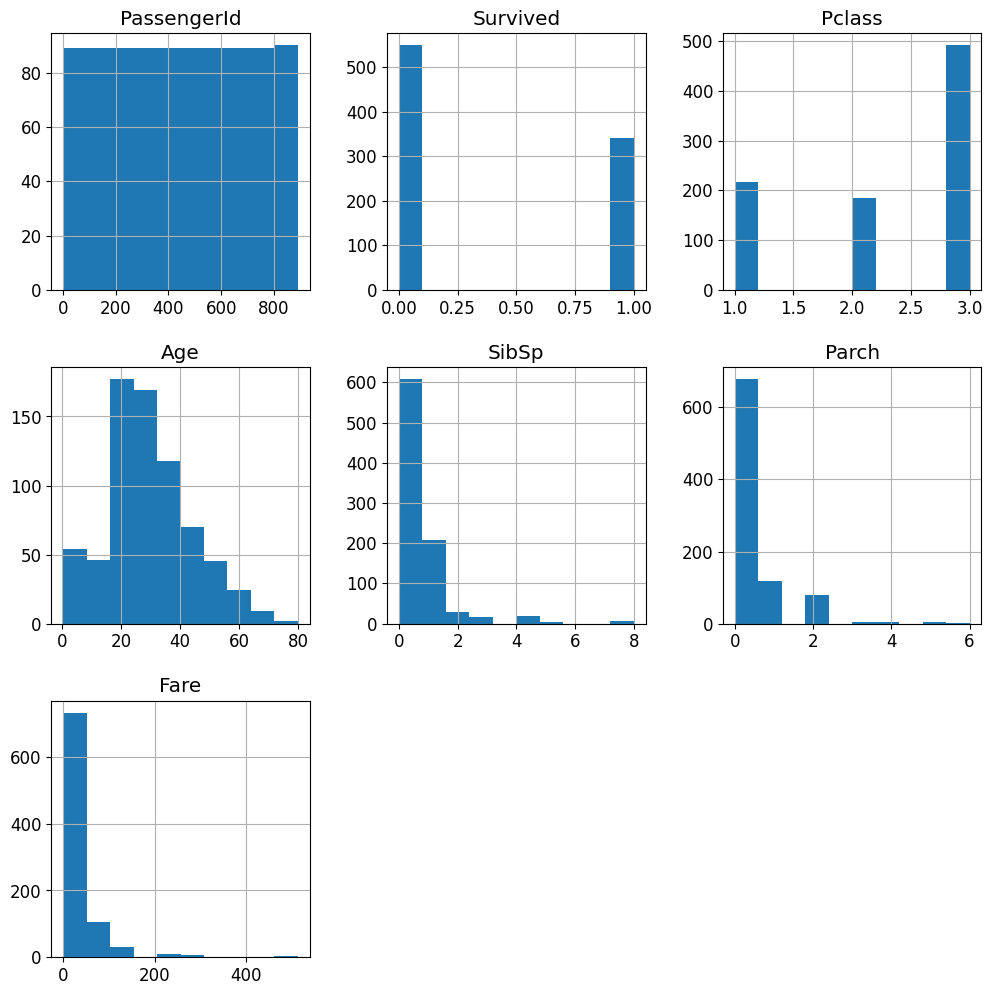

In [102]:
df.hist(figsize=(12, 12))
plt.show()

In [103]:
# Feature <Cabin> has missing data. Furthermore, it has categorial data.
# This feature does not look relevant also in predicting the survival of 
# passengers. For this reason, instead of filling out the missing data,
# removing this data from the dataset
df= df.drop(labels='Cabin', axis='columns')

In [104]:
# Feature <Name> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Name', axis='columns')

In [105]:
# Feature <Age> has missing data. Filling out the missing data for <Age>
df['Age']= df['Age'].fillna(df['Age'].mean())

In [106]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [107]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [108]:
# Encoding features <Sex> & <Embarked> to convert them from categorical data to numerical data

# Instantiating the label encoder
label_encoder = LabelEncoder()

# Encoding features <Sex> & <Embarked>
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [109]:
# Feature <Ticket> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Ticket', axis='columns')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [110]:
columns_titles = ["Survived", "PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df=df.reindex(columns=columns_titles)
df.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.0,1,0,7.2500,2
1,1,2,1,0,38.0,1,0,71.2833,0
2,1,3,3,0,26.0,0,0,7.9250,2
3,1,4,1,0,35.0,1,0,53.1000,2
4,0,5,3,1,35.0,0,0,8.0500,2


In [111]:
# Calculate the correlation matrix for the dataset
df.corr()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.005007,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
PassengerId,-0.005007,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.338481,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<Axes: >

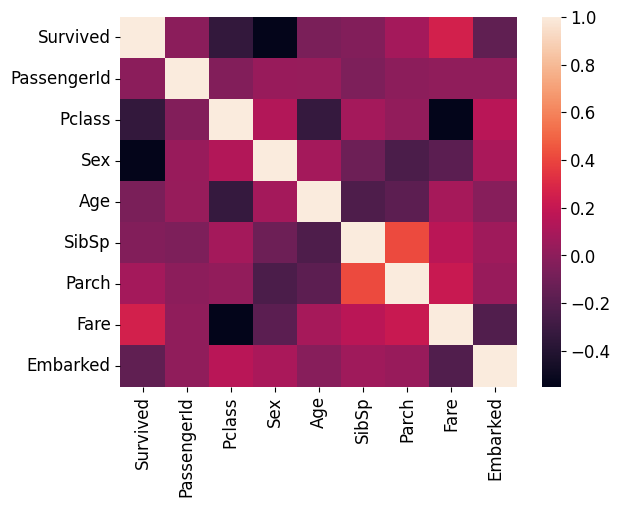

In [112]:
#Visualization of Correlations
# fig = plt.figure(figsize=(10,5))
# sns.heatmap(df.corr(),annot=True,cmap="Blues")
sns.heatmap(df.corr())

### Prepare Data

<Axes: >

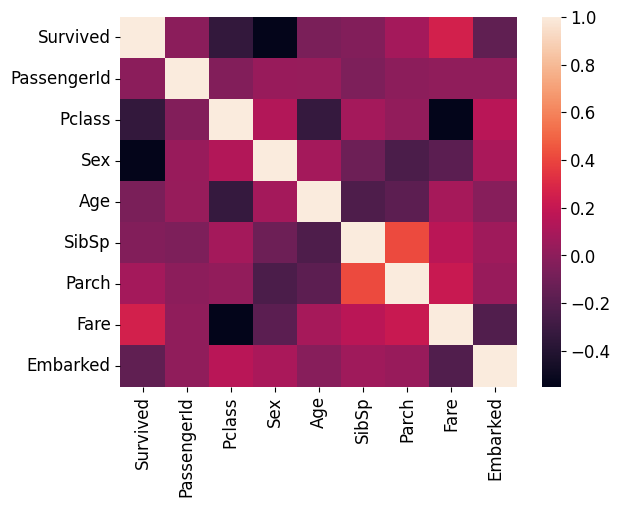

In [113]:
# Calculate the correlation matrix for the dataset
data_corr = df.corr()
#Visualization of Correlations
sns.heatmap(data_corr)

In [114]:
# Split the dataset into input (X) and output (y) attributed
X = df.drop(columns = ['Survived'])
y = df['Survived']

### Supporting Functions

In [115]:
def calculate_print_performace_metrics(y_train_test, y_pred_train_test):
    # Calculate & print performace metrics
    print('Accuracy: {}'.format(accuracy_score(y_train_test, y_pred_train_test)))
    print('Precision: {}'.format(precision_score(y_train_test, y_pred_train_test)))
    print('Recall: {}'.format(recall_score(y_train_test, y_pred_train_test)))
    print('confusion_matrix: ', confusion_matrix(y_train_test, y_pred_train_test))
    displ = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train_test, y_pred_train_test))
    displ.plot()
    print(classification_report(y_train_test, y_pred_train_test))

In [116]:
def calculate_plot_roc(y_train_test, y_pred_train_test_probs):
    '''
    
    Parameters:
        y_train_test: true values (first argument), 
        y_pred_train_test_probs: predicted probabilities(second argument)

    Returns:
        roc_curve returns 3 objects fpr, tpr, thresholds
        fpr: false positive rate
        tpr: true positive rate
        thresholds:
    '''
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_train_test, y_pred_train_test_probs)
    # print(fpr)
    # print(tpr)
    # print(thresholds)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_train_test, y_pred_train_test_probs)
    print(f"AUC Score: {auc_score}")
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.legend()
    plt.show()

### Common Steps for All Models

In [117]:
# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determine the number of input features
n_features = X_train.shape[1]
print(n_features)

(623, 8) (268, 8) (623,) (268,)
8


### Model Building and Evaluate Algorithm 
#### ML Model #1 - Random Forest Classifier

In [118]:
# Initialize the instance of Random Forest Classifier
rf_clf = RandomForestClassifier()
# Use all the defaults of the model as set in sci-kit learn
# RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#                        min_samples_split=2, min_samples_leaf=1, 
#                        min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                        bootstrap=True, oob_score=False, n_jobs=None, 
#                        random_state=None, verbose=0, warm_start=False, 
#                        class_weight=None, ccp_alpha=0.0, max_samples=None, 
#                        monotonic_cst=None)
# Fit the training data to the random forest model
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
confusion_matrix:  [[393   0]
 [  0 230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       230

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

AUC Score: 1.0


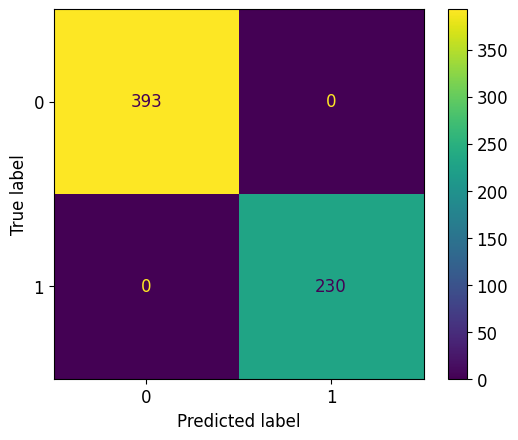

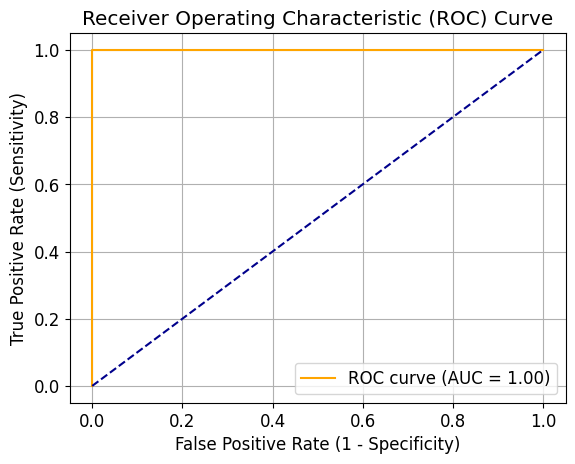

In [119]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = rf_clf.predict(X_train)
y_pred_train_probs_temp = rf_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)
  

Accuracy: 0.7835820895522388
Precision: 0.78125
Recall: 0.6696428571428571
confusion_matrix:  [[135  21]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       156
           1       0.78      0.67      0.72       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

AUC Score: 0.812127976190476


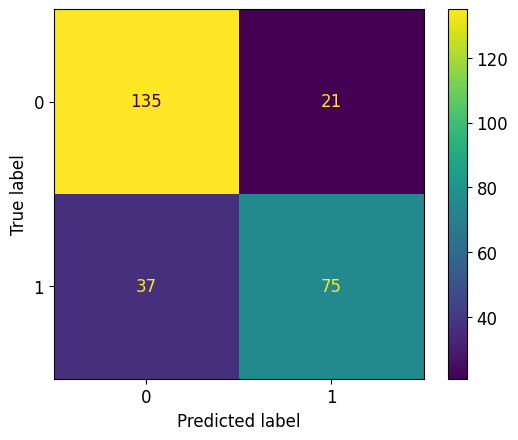

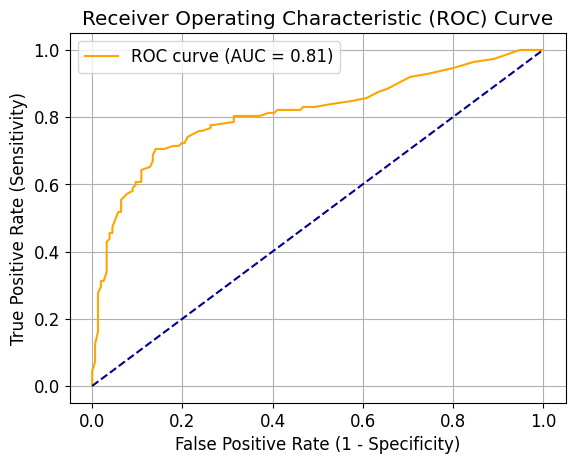

In [120]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = rf_clf.predict(X_test)
y_pred_test_probs_temp = rf_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


Performance metrics show that the model is behaving too good for the training dataset but it is performing that well on the test data. 
This shows model overfitting. There is a need to tune model hyperparameters to reduce the overfitting.

### Improve Accuracy
#### ML Model #1 - Random Forest Classifier

In [121]:
# Optimize the hyperparameters of the model to improve accurary
parameters = {'n_estimators': [120, 125, 130], 
             'max_depth': [16, 18, 22],
              'max_features': ['sqrt', 'log2', None],
              'max_leaf_nodes': [84, 86, 88]
             }
rf_clf_opt = RandomForestClassifier()
rf_clf_opt = GridSearchCV(rf_clf_opt, parameters)
# Fit the training data to the random forest model
rf_clf_opt.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [16, 18, 22],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [84, 86, 88],
                         'n_estimators': [120, 125, 130]})

Accuracy: 0.9695024077046549
Precision: 0.9906976744186047
Recall: 0.9260869565217391
confusion_matrix:  [[391   2]
 [ 17 213]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       393
           1       0.99      0.93      0.96       230

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.97       623
weighted avg       0.97      0.97      0.97       623

AUC Score: 1.0


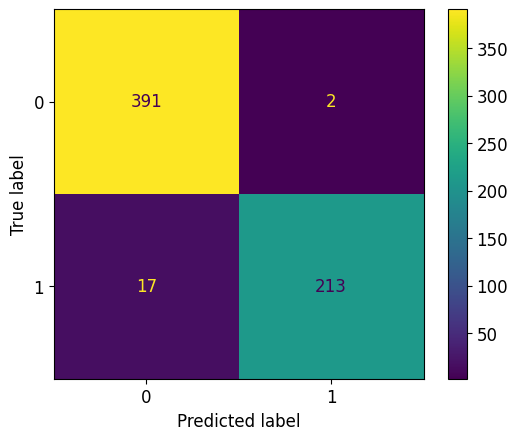

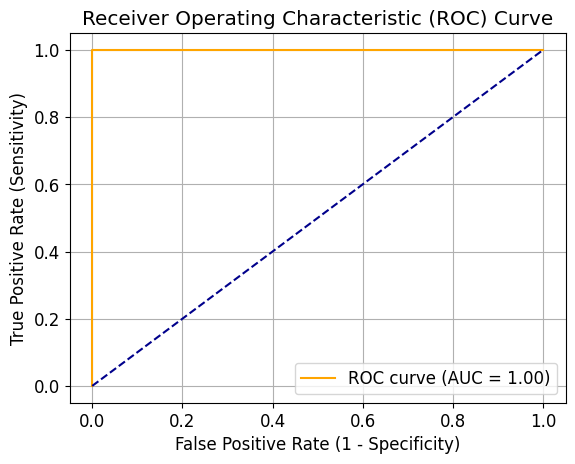

In [122]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = rf_clf_opt.predict(X_train)
y_pred_train_probs_temp = rf_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.7835820895522388
Precision: 0.8068181818181818
Recall: 0.6339285714285714
confusion_matrix:  [[139  17]
 [ 41  71]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       156
           1       0.81      0.63      0.71       112

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

AUC Score: 0.812127976190476


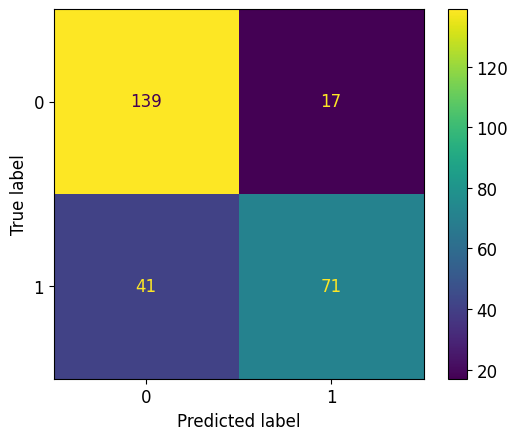

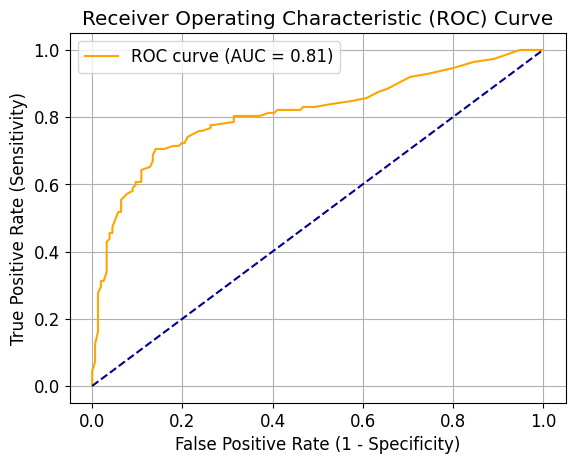

In [123]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = rf_clf_opt.predict(X_test)
y_pred_test_probs_temp = rf_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


Tuning the model hyperparameters has improved the performance of the model in terms of accuracy & precision. However, there is still room to tune the hyperparameters for improving the performance of the model. In short, the model needs more optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #2 - Decision Tree Classifier

In [124]:
# Initialize the instance of Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
# Use all the defaults of the model as set in sci-kit learn
# DecisionTreeClassifier(*, criterion='gini', splitter='best', 
#                        max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                        max_features=None, random_state=None, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                        class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
# Fit the training data to the decision tree model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
confusion_matrix:  [[393   0]
 [  0 230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       230

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

AUC Score: 1.0


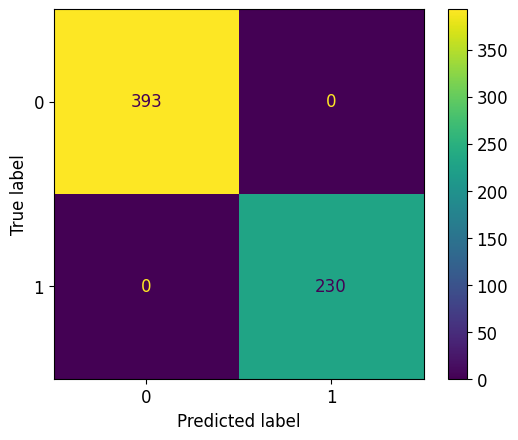

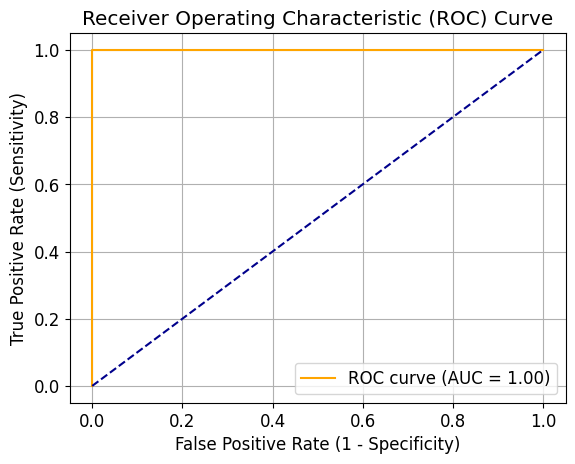

In [125]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = dt_clf.predict(X_train)
y_pred_train_probs_temp = dt_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)
  

Accuracy: 0.7425373134328358
Precision: 0.7009345794392523
Recall: 0.6696428571428571
confusion_matrix:  [[124  32]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       156
           1       0.70      0.67      0.68       112

    accuracy                           0.74       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268

AUC Score: 0.7322573260073261


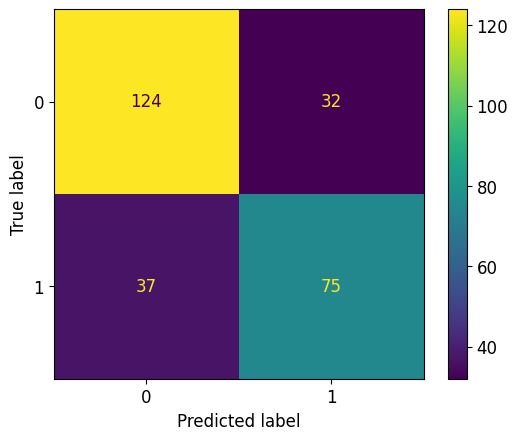

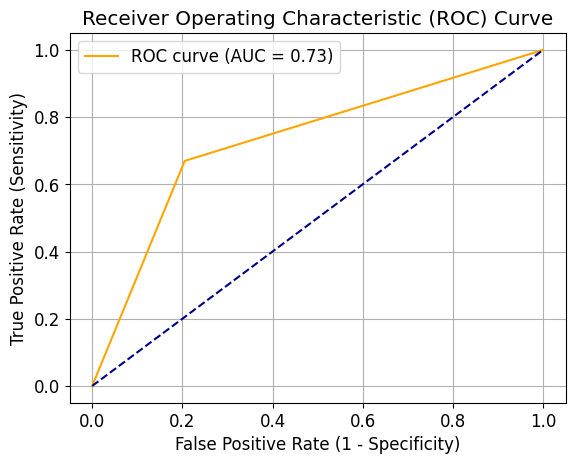

In [126]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = dt_clf.predict(X_test)
y_pred_test_probs_temp = dt_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


Performance metrics show that the model is behaving too good for the training dataset but it is not performing well on the test data. 
This shows model overfitting. There is a need to tune model hyperparameters to reduce the overfitting.

### Improve Accuracy
#### ML Model 2 - Decision Tree Classifier

In [127]:
# Optimize the hyperparameters of the model to improve accurary
parameters = {'max_depth': [6, 7, 8, 9, 10, 12], 
              'max_leaf_nodes': [36, 40, 44, 48, 50, 52],
              'max_features': [10, 12, 14, 16, 18]}
dt_clf_opt = DecisionTreeClassifier()
dt_clf_opt = GridSearchCV(dt_clf_opt, parameters)
# Fit the training data to the decision tree model
dt_clf_opt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 12],
                         'max_features': [10, 12, 14, 16, 18],
                         'max_leaf_nodes': [36, 40, 44, 48, 50, 52]})

In [128]:
dt_clf_opt.best_params_

{'max_depth': 9, 'max_features': 16, 'max_leaf_nodes': 36}

Accuracy: 0.9197431781701445
Precision: 0.9090909090909091
Recall: 0.8695652173913043
confusion_matrix:  [[373  20]
 [ 30 200]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       393
           1       0.91      0.87      0.89       230

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.91       623
weighted avg       0.92      0.92      0.92       623

AUC Score: 0.9336707600398273


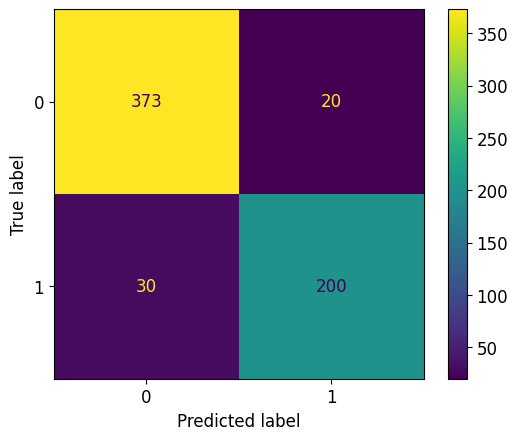

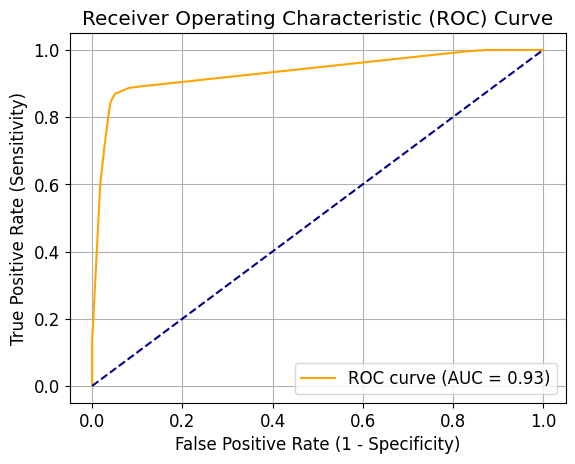

In [129]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = dt_clf_opt.predict(X_train)
y_pred_train_probs_temp = dt_clf_opt.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.753731343283582
Precision: 0.7129629629629629
Recall: 0.6875
confusion_matrix:  [[125  31]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       156
           1       0.71      0.69      0.70       112

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.75      0.75      0.75       268

AUC Score: 0.7655391483516483


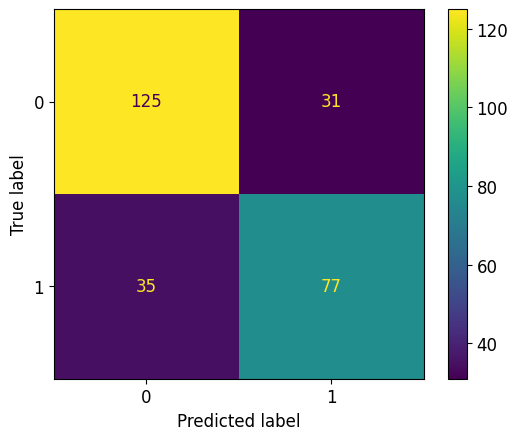

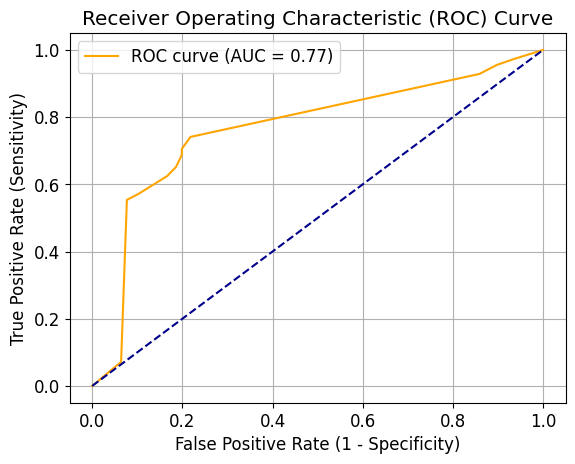

In [130]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = dt_clf_opt.predict(X_test)
y_pred_test_probs_temp = dt_clf_opt.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


Tuning the model hyperparameters has improved the performance of the model in terms of accuracy & precision. However, there is still room to tune the hyperparameters for improving the performance of the model. In short, the model needs more optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #3 - Support Vector Machine (SVM) Classifier

In [131]:
# Initialize the instance of the Support Vector Machine (SVM) Classifier
svc_clf = SVC()
# Use all the defaults of the model as set in sci-kit learn
# SVC(*, C=1.0, kernel='rbf', degree=3, 
#     gamma='scale', coef0=0.0, shrinking=True, 
#     probability=False, tol=0.001, cache_size=200, 
#     class_weight=None, verbose=False, max_iter=-1, 
#     decision_function_shape='ovr', break_ties=False, 
#     random_state=None)
# Fit the training data to the SVM model
svc_clf.fit(X_train, y_train)

SVC()

Accuracy: 0.6484751203852327
Precision: 0.6896551724137931
Recall: 0.08695652173913043
confusion_matrix:  [[384   9]
 [210  20]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       393
           1       0.69      0.09      0.15       230

    accuracy                           0.65       623
   macro avg       0.67      0.53      0.47       623
weighted avg       0.66      0.65      0.55       623



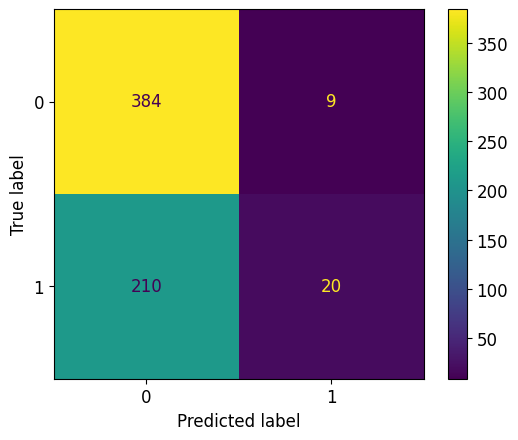

In [132]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = svc_clf.predict(X_train)
# y_pred_train_probs_temp = svc_clf.predict_proba(X_train)
# y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
# calculate_plot_roc(y_train, y_pred_train_probs)
  

Accuracy: 0.6156716417910447
Precision: 0.9090909090909091
Recall: 0.08928571428571429
confusion_matrix:  [[155   1]
 [102  10]]
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       156
           1       0.91      0.09      0.16       112

    accuracy                           0.62       268
   macro avg       0.76      0.54      0.46       268
weighted avg       0.73      0.62      0.50       268



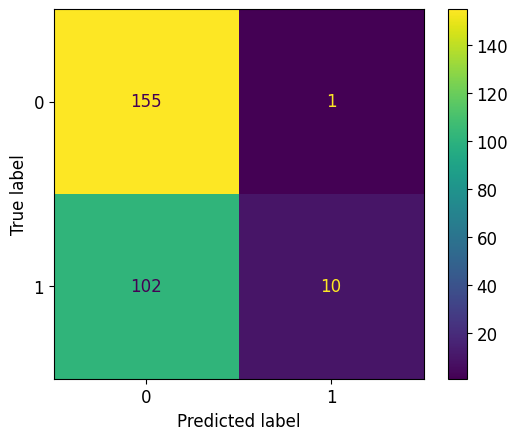

In [133]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = svc_clf.predict(X_test)
# y_pred_test_probs_temp = svc_clf.predict_proba(X_test)
# y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
# calculate_plot_roc(y_test, y_pred_test_probs)


The model performance for training & test datasets is not drastically different. However, the model needs optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #4 - Logistic Regression

In [134]:
# Initialize the instance of Logistic Regression
logit_reg = LogisticRegression()
# Use all the defaults of the model as set in sci-kit learn
# LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, 
#                    C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, 
#                    solver='lbfgs', max_iter=100, multi_class='deprecated', 
#                    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Fit the training data to the logistic regression model
logit_reg.fit(X_train, y_train)

c:\Users\BatoolTalha\anaconda3\envs\AIDI_2000_Applied_ML_n_AI\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8154093097913323
Precision: 0.7725118483412322
Recall: 0.7086956521739131
confusion_matrix:  [[345  48]
 [ 67 163]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       393
           1       0.77      0.71      0.74       230

    accuracy                           0.82       623
   macro avg       0.80      0.79      0.80       623
weighted avg       0.81      0.82      0.81       623

AUC Score: 0.8530810930412656


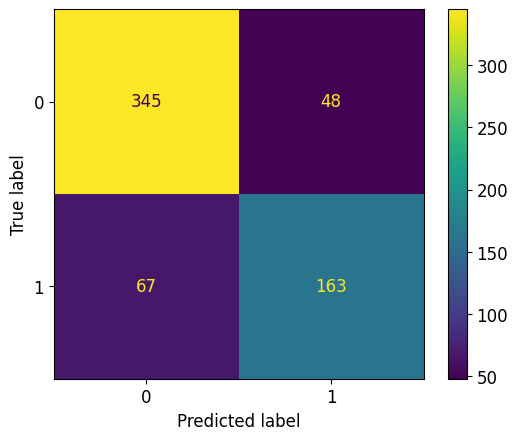

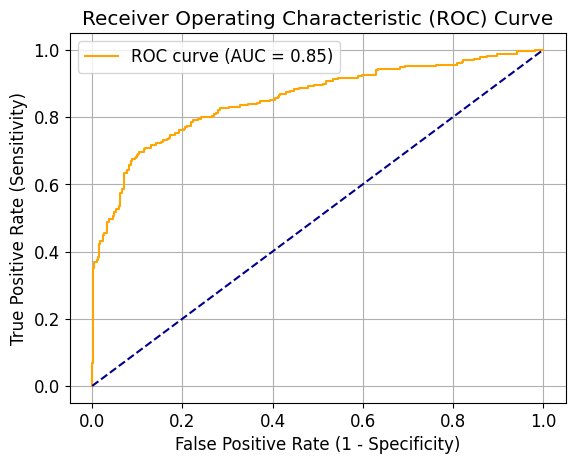

In [135]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = logit_reg.predict(X_train)
y_pred_train_probs_temp = logit_reg.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.7425373134328358
Precision: 0.7362637362637363
Recall: 0.5982142857142857
confusion_matrix:  [[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268

AUC Score: 0.8025984432234433


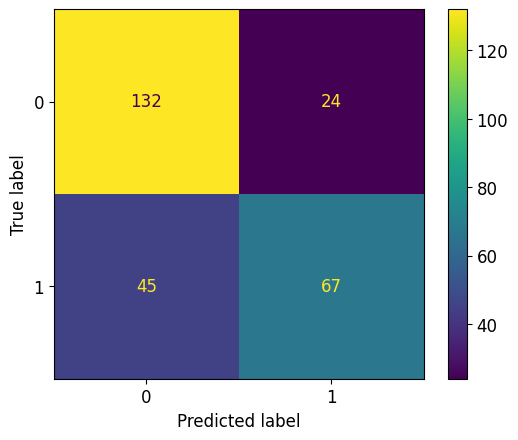

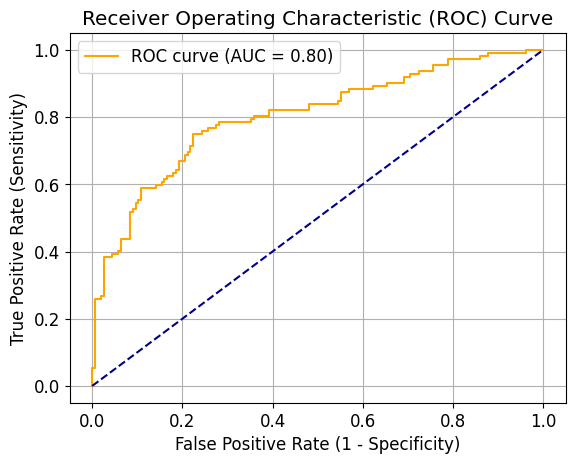

In [136]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = logit_reg.predict(X_test)
y_pred_test_probs_temp = logit_reg.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


The model performance for training & test datasets is not drastically different. However, the model needs optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #5 - Gradient Boost Classifier

In [137]:
# Initialize the instance of Gradient Boost Classifier
gb_clf = GradientBoostingClassifier()
# Use all the defaults of the model as set in sci-kit learn
# GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, 
#                            n_estimators=100, subsample=1.0, 
#                            criterion='friedman_mse', min_samples_split=2, 
#                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                            max_depth=3, min_impurity_decrease=0.0, init=None, 
#                            random_state=None, max_features=None, verbose=0, 
#                            max_leaf_nodes=None, warm_start=False, 
#                            validation_fraction=0.1, n_iter_no_change=None, 
#                            tol=0.0001, ccp_alpha=0.0)
# Fit the training data to the gradient boost model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy: 0.9213483146067416
Precision: 0.9330143540669856
Recall: 0.8478260869565217
confusion_matrix:  [[379  14]
 [ 35 195]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.93      0.85      0.89       230

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.91       623
weighted avg       0.92      0.92      0.92       623

AUC Score: 0.9727403473835601


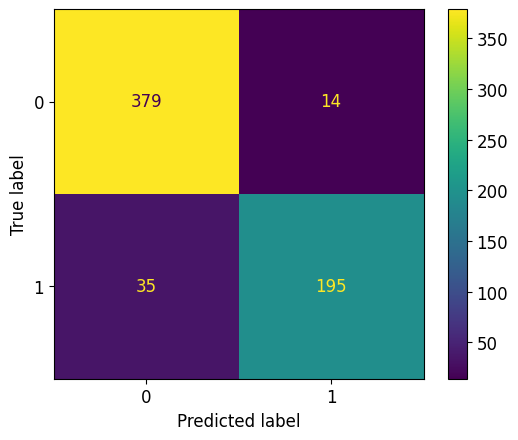

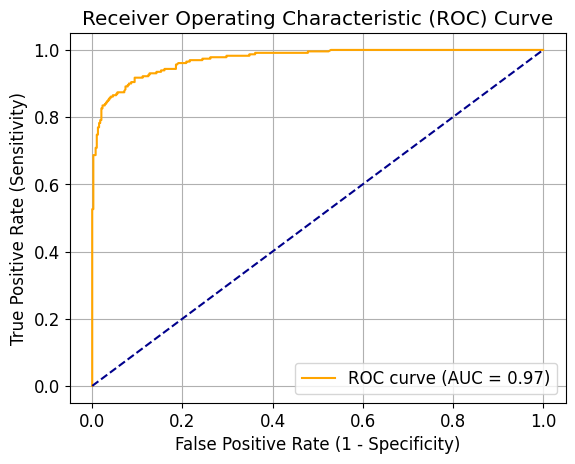

In [138]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = gb_clf.predict(X_train)
y_pred_train_probs_temp = gb_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.7947761194029851
Precision: 0.8275862068965517
Recall: 0.6428571428571429
confusion_matrix:  [[141  15]
 [ 40  72]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       156
           1       0.83      0.64      0.72       112

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

AUC Score: 0.8235462454212453


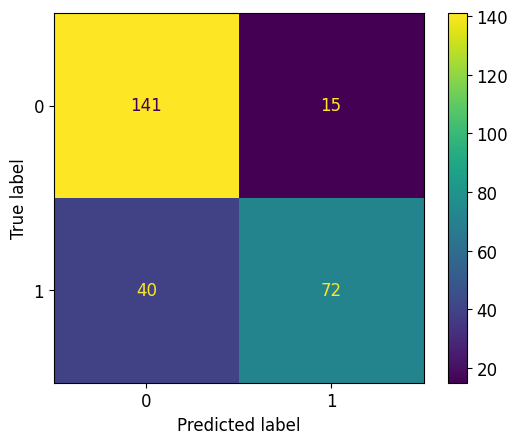

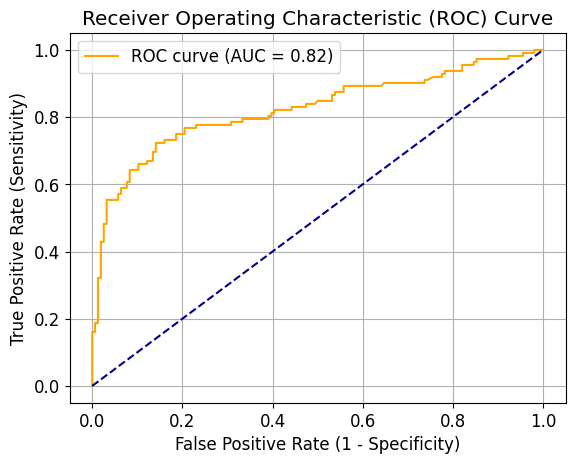

In [139]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = gb_clf.predict(X_test)
y_pred_test_probs_temp = gb_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


The model performance for training & test datasets is not drastically different. However, the model needs optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #6 - Neural Networks Classifier

In [140]:
#Step-1 Define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(14, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

#Step-2 Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

#Step-3 Fit the model
model.fit(X_train, y_train, epochs=250, batch_size=8, verbose=1)



c:\Users\BatoolTalha\anaconda3\envs\AIDI_2000_Applied_ML_n_AI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4426 - loss: 63.5820
Epoch 2/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.6704 - loss: 2.7801
Epoch 3/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6322 - loss: 1.7169
Epoch 4/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6552 - loss: 1.2435
Epoch 5/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5753 - loss: 1.1503
Epoch 6/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.6413 - loss: 0.9004
Epoch 7/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6355 - loss: 0.9087
Epoch 8/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.6202 - loss: 0.7980
Epoch 9/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6133 - loss: 0.9612  
Epoch 10/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6827 - loss: 0.7229
Epoch 11/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6472 - loss: 0.8501
Epoch 12/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1000

[0.6196625828742981, 0.7388059496879578]
Loss =  0.6196625828742981
Accuracy =  0.7388059496879578
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Predicted:  [[2.81033348e-02]
 [2.30791681e-02]
 [2.43804175e-02]
 [7.76940165e-03]
 [9.89783347e-01]
 [7.14259267e-01]
 [6.62558107e-03]
 [4.05206606e-02]
 [4.77642938e-02]
 [9.45741236e-01]
 [4.60006595e-01]
 [3.66548798e-03]
 [7.87596583e-01]
 [9.20424461e-01]
 [7.45468913e-03]
 [8.93803407e-03]
 [7.74620697e-02]
 [9.46359243e-03]
 [9.76165663e-03]
 [1.70535684e-01]
 [6.26129627e-01]
 [2.69810315e-02]
 [4.03580517e-02]
 [7.91200623e-02]
 [1.13454871e-02]
 [5.19010201e-02]
 [5.79459071e-01]
 [1.11174524e-01]
 [6.09221533e-02]
 [8.29905510e-01]
 [5.39003730e-01]
 [7.87757516e-01]
 [3.60561050e-02]
 [7.59641156e-02]
 [1.38982341e-01]
 [1.71601083e-02]
 [5.99225089e-02]
 [1.09324474e-02]
 [5.33134580e-01]
 [7.89969414e-02]
 [6.00626227e-03]
 [1.28313392e-01]
 [3.47042419e-02]
 [2.40463894e-02]
 [7.17148110e-02]
 [1.22730089e-02]
 [5.82503639e-02]
 [3.6

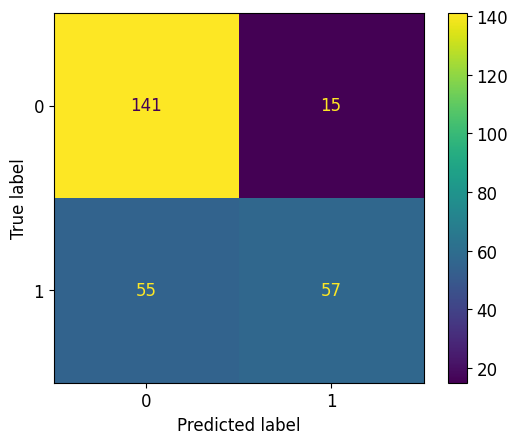

In [141]:
#Step-4 Evaluate the model
loss_and_metrics = model.evaluate(X_test, y_test, verbose=0)
print(loss_and_metrics)
print('Loss = ', loss_and_metrics[0])
print('Accuracy = ', loss_and_metrics[1])

#Step-5 Make a prediction
# validation_data = np.array([1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,-0.32192,0.56971,-0.29674,0.36946])
y_pred_val_data = model.predict(X_test)
print('Predicted: ', y_pred_val_data)
# print('Predicted: %.3f' % y_pred_val_data)
predicted = tf.squeeze(y_pred_val_data)
print(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

### Model Comparison

| Sr. # | Model                                                | Accuracy Score  |
| ----- | --------------------------------------------------   | --------------- |
| 1     | Random Forest with optimization                      | 77%             |
| 2     | Decision Tree with optimization                      | 75%             |
| 3     | SVC without optimization                             | 61%             |
| 4     | Logistic Regression without optimization             | 74%             |
| 5     | Gradient Boost Classifier without optimization       | 79%             |
| 6     | Ariticial Neural Networks (ANN) without optimization | 76%             |